In [ ]:
import cv2
import os
import IPython
import torch
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install ultralytics
from ultralytics.yolo.utils.torch_utils import select_device
from ultralytics import YOLO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.7/592.7 kB 35.9 MB/s eta 0:00:00


In [ ]:
! unzip 'archive.zip' -d datasets

Archive:  archive.zip
  inflating: datasets/Car-Person-v2-Roboflow-Owais-Ahmad/README.dataset.txt  
  inflating: datasets/Car-Person-v2-Roboflow-Owais-Ahmad/README.roboflow.txt  
  inflating: datasets/Car-Person-v2-Roboflow-Owais-Ahmad/data.yaml  
  inflating: datasets/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000000034_jpg.rf.7a04a279594485c2a0d1f1487b427cf5.jpg  
  inflating: datasets/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000000045_jpg.rf.1cf2ed6be9c43756838374df242a3c84.jpg  
  inflating: datasets/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000000048_jpg.rf.d89a6ef25b61be94be2972dc5b70f9b7.jpg  
  inflating: datasets/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000000050_jpg.rf.f741911c298b1521b1cc92b8a9590339.jpg  
  inflating: datasets/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000000102_jpg.rf.79e39dcbcd8179ea9e837ce05fb096a1.jpg  
  inflating: datasets/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000000108_jpg.rf.126c3

In [ ]:
! pwd
! cp -f /content/train_data/data.yaml /content
! mv data.yaml config.yaml

/content


In [ ]:
model = YOLO('yolov8m.pt') # latest yolo model

100%|██████████| 49.7M/49.7M [00:02<00:00, 20.8MB/s]


In [ ]:
coco_path = os.path.join('', 'coco.txt')
my_file = open(coco_path, "r")
data = my_file.read()
class_list = data.split("\n") 

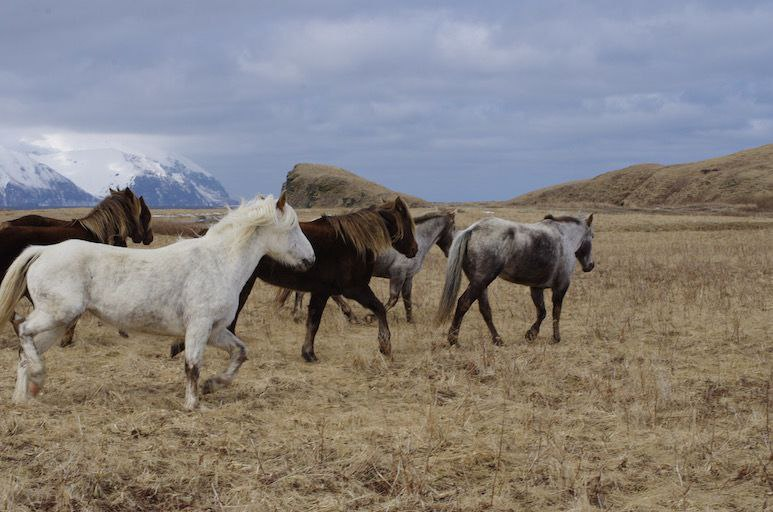

In [ ]:
Image('horse.jpg')

In [ ]:
result = model('horse.jpg', save=True)


image 1/1 /content/horse.jpg: 448x640 5 horses, 980.5ms
Speed: 4.2ms preprocess, 980.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


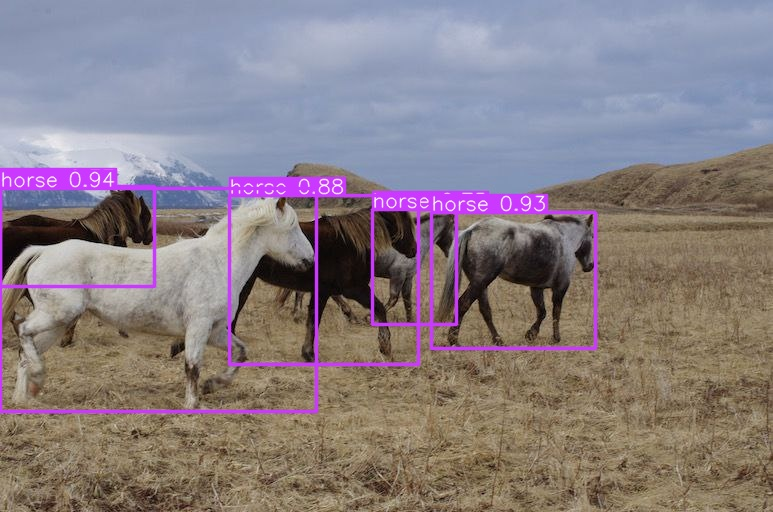

In [ ]:
Image('runs/detect/predict/horse.jpg')

In [ ]:
#config.yaml
path: Car-Person-v2-Roboflow-Owais-Ahmad
train: train/images
val: valid/images
test: test/images

nc: 2
names: ['1', '2']

In [ ]:
#coco.txt

1
2

In [ ]:
!yolo detect train model=yolov8n.pt data=config.yaml epochs=3 imgsz=416 batch=4 workers=4

100% 6.23M/6.23M [00:00<00:00, 343MB/s]
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=config.yaml, epochs=3, patience=50, batch=4, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fal